# Single Neural Logistic Regression

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

In [3]:
# Import Penguin Dataset as a Dataframe object
pg = pd.read_csv("https://raw.githubusercontent.com/yw110-1/INDE-577/main/Data/penguins.csv")
pg = pg.dropna()
pg.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


Here we would like to show linearly and non-linearly separable data.

In [134]:
adelie = pg[pg['species'] == "Adelie"]
gentoo = pg[pg['species'] == "Gentoo"]
chinstrap = pg[pg['species'] == "Chinstrap"]
torgersen = pg[pg['island'] == "Torgersen"]
dream = pg[pg['island'] == "Dream"]
biscoe = pg[pg['island'] == "Biscoe"]
pg.species.value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

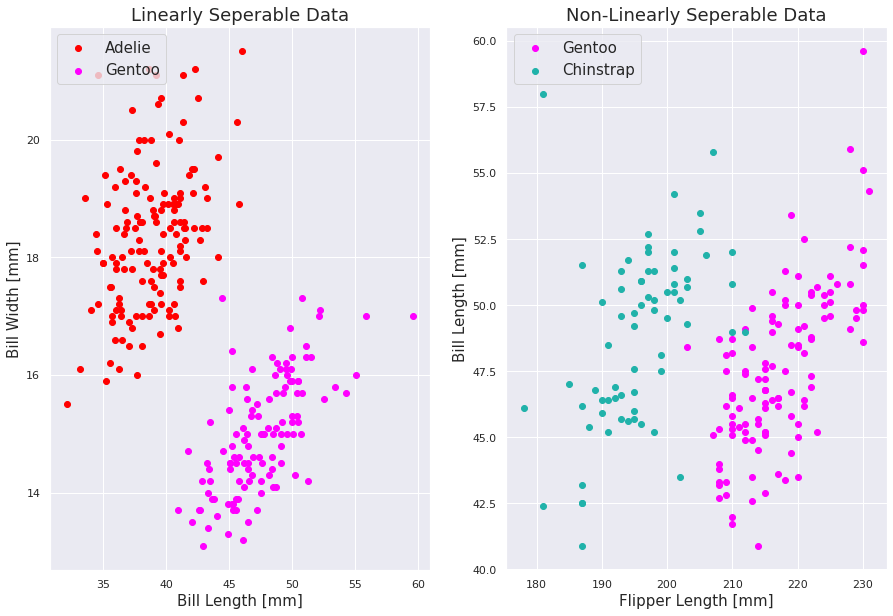

In [131]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(adelie.bill_length_mm, 
            adelie.bill_depth_mm, 
            color = "red", 
            label = "Adelie")
ax1.scatter(gentoo.bill_length_mm, 
            gentoo.bill_depth_mm, 
            color = "magenta", 
            label = "Gentoo")
ax1.set_xlabel("Bill Length [mm]", fontsize = 15)
ax1.set_ylabel("Bill Width [mm]", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")
ax1.set_title("Linearly Seperable Data", fontsize = 18)


ax2.scatter(gentoo.flipper_length_mm, 
            gentoo.bill_length_mm,  
            color = "magenta", 
            label = "Gentoo")
ax2.scatter(chinstrap.flipper_length_mm, 
            chinstrap.bill_length_mm,        
            color = "lightseagreen", 
            label = "Chinstrap")
ax2.set_xlabel("Flipper Length [mm]", fontsize = 15)
ax2.set_ylabel("Bill Length [mm]", fontsize = 15)
ax2.legend(fontsize = 15, loc = "upper left")
ax2.set_title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()

We will build the single neuron class and define sigmoid activation function and MSE cost function.

In [143]:
# Single Neuron Class
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        return fig

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()

In [145]:
# Define sigmoid activation function
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

# Define MSE cost function
def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

In [147]:
node = SingleNeuron(sigmoid, cross_entropy_loss)

In [149]:
X = pg[pg['species'] != 'Adelie'].bill_length_mm.values
X = X.reshape(-1, 1)
y = np.where(pg[pg['species'] != 'Adelie'].species == "Chinstrap", 0, 1)
node.train(X, y, alpha = 0.01, epochs = 500)

<ipython-input-145-a810ec3a9f20>:7: RuntimeWarning: divide by zero encountered in log
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)
<ipython-input-145-a810ec3a9f20>:7: RuntimeWarning: invalid value encountered in multiply
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)



Now that we have trained the variable ```node```, we can now visualize the binary cross entropy loss over each epoch by plotting the values in the ```SingleNeuron.errors_``` attribute. This can be done by running the following code in the cell below.

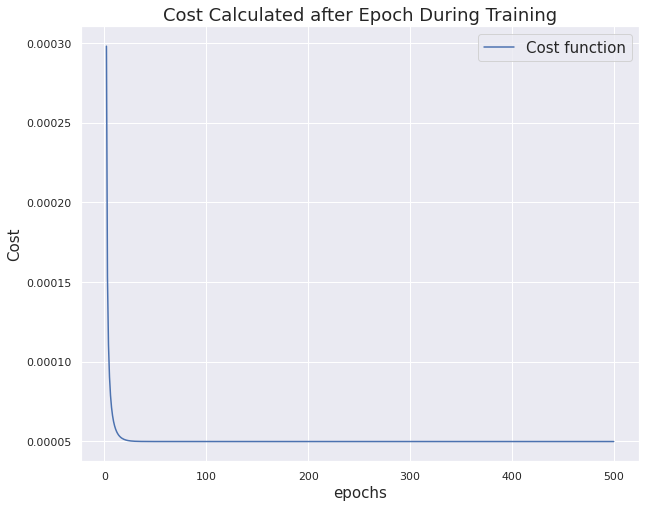

In [150]:
node.plot_cost_function()
plt.show()

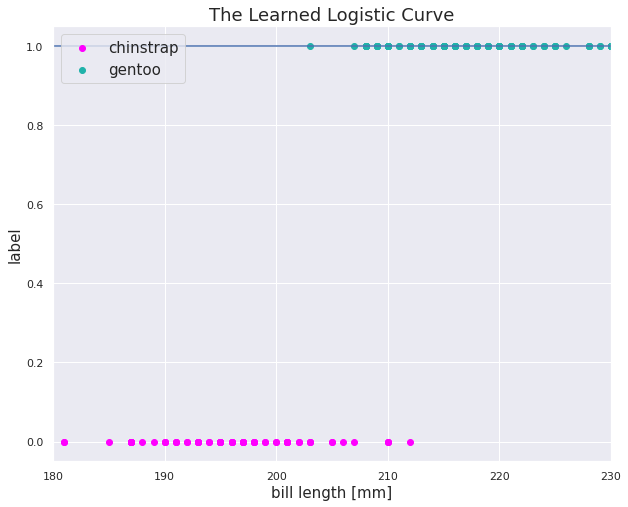

In [157]:
plt.figure(figsize = (10, 8))
plt.xlim((180, 230))
plt.scatter(chinstrap.flipper_length_mm, 
            np.zeros(68), 
            color = "magenta", 
            label = "chinstrap")
plt.scatter(gentoo.flipper_length_mm, 
            np.ones(119), 
            color = "lightseagreen", 
            label = "gentoo")
domain = np.linspace(180, 230, 100)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

In [158]:
node.predict(X)

array([6.25490332e-06, 2.22243690e-06, 3.13781026e-06, 2.22243690e-06,
       4.20124555e-06, 5.62508765e-06, 7.53147977e-06, 5.33437607e-06,
       1.31479691e-05, 5.19470387e-06, 2.48543881e-05, 2.89773121e-06,
       7.33428031e-06, 3.39777997e-06, 6.77312456e-06, 2.67602095e-06,
       1.85632477e-05, 2.74797244e-06, 6.09112872e-06, 3.13781026e-06,
       2.10757820e-06, 8.15546501e-06, 5.62508765e-06, 5.93164227e-06,
       1.46200755e-05, 6.25490332e-06, 3.98411962e-06, 3.58295177e-06,
       2.22243690e-06, 4.54932119e-06, 1.50131679e-05, 8.15546501e-06,
       1.74033312e-07, 2.82185852e-06, 3.39777997e-06, 1.58313436e-05,
       9.81992730e-06, 1.09194151e-05, 3.13781026e-06, 1.54168292e-05,
       2.47127407e-06, 7.73398136e-06, 2.47127407e-06, 1.94632375e-06,
       1.21420055e-05, 7.33428031e-06, 1.94632375e-06, 8.59991831e-06,
       7.94192764e-06, 5.47780367e-06, 3.30881431e-06, 8.15546501e-06,
       2.16424573e-06, 5.62508765e-06, 8.37474377e-06, 1.15144953e-05,
      

In [159]:
np.rint(node.predict(X)) != y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False,

In [160]:
classification_error = (np.rint(node.predict(X)) != y).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y)}")

Classification Error = 0.6363636363636364


In [ ]:
node.plot_decision_boundary(X, y)
plt.show()

In [ ]:
# Instantiate a new single neuron.
node_two = SingleNeuron(sigmoid, cross_entropy_loss)

# Create a numpy.ndarray of petal length and sepal length values for
# the versicolor and virginica flowers, respectively. 
X_two = df.iloc[50:][["petal_length", "sepal_length"]].values

# Train the new single neuron model on the new feature vectors.
node_two.train(X_two, y, alpha = 0.01, epochs = 10_000)


plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         label = "node Cross Entropy Loss")
plt.plot(range(1, len(node_two.errors_) + 1), 
         node_two.errors_,
         label = " node_two Cross Entropy Loss")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("Cross Entropy Loss", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Model Cost Comparison During Training", fontsize = 18)


plt.show()

In [ ]:
node_two.plot_decision_boundary(X_two, y)

In [ ]:
def sign(z):
    return np.sign(z)

def MSE(y_hat, y):
    return .5*(y_hat - y)**2

# Instantiate a new single neuron.
node_three = SingleNeuron(sign, MSE)

# Create a numpy.ndarray of petal length and sepal length values for
# the versicolor and virginica flowers, respectively. 
X_three = df.iloc[50:][["petal_length", "sepal_length"]].values

y_three = np.where(df.iloc[50:]["species"] == "versicolor", -1, 1)


# Train the new single neuron model on the new feature vectors.
node_three.train(X_three, y_three, alpha = 0.001, epochs = 5_000)

node_three.plot_decision_boundary(X_three, y_three)
plt.show()

In [ ]:
node_three.plot_cost_function()

In [ ]:
def linear(z):
    return z

# Instantiate a new single neuron.
node_four = SingleNeuron(linear, MSE)

# Create a numpy.ndarray of petal length and sepal length values for
# the versicolor and virginica flowers, respectively. 
X_four = df.iloc[0:50]["sepal_length"].values
X_four = X_four.reshape(-1, 1)

y_four = df.iloc[0:50]["sepal_width"].values


# Train the new single neuron model on the new feature vectors.
node_four.train(X_four, y_four, alpha = 0.001, epochs = 5_000)

plt.figure(figsize = (10, 8))
plt.scatter(X_four, y_four, label = "setosa", color = "magenta")

domain = np.linspace(np.min(X_four), np.max(X_four), 50)
plt.plot(domain, node_four.predict(domain.reshape(-1, 1)), label = "regression line")
plt.show()